In [1]:
import numpy as np
import skimage.io
import skimage.measure
#from scipy.ndimage.measurements import label
import skimage.external.tifffile as tiff
import matplotlib.pyplot as plt

In [2]:
def im_prep(str_pred, str_mask, win_size):
    prediction = skimage.io.imread(str_pred)
    mask = skimage.io.imread(str_mask)
    
    mask = mask[win_size:-win_size, win_size:-win_size]
    mask = np.pad(mask, (win_size, win_size), 'constant')
    prediction = np.pad(prediction, (win_size, win_size), 'constant')
    
    return prediction, mask


In [3]:
wshed_pred, wshed_mask = im_prep('wshed_pred.tif', 'wshed_mask.tif', 15)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,10]

In [ ]:
plt.imshow(wshed_pred)

In [ ]:
plt.imshow(wshed_mask)

In [ ]:
print('watershed mask max is: ', wshed_mask.max(), ' shape is: ', wshed_mask.shape)
print('watershed prediction max is: ', wshed_pred.max(), ' shape is: ', wshed_pred.shape)

In [ ]:
def dice_pixel_quick(pred_input, truth_input):
    
    pred = np.copy(pred_input)
    truth = np.copy(truth_input)
    
    pred[pred != 0] = 1
    truth[truth != 0] = 1    
    
    true_pos = 0
    false_pos = 0
    false_neg = 0
    
    if pred.shape != truth.shape:
        raise ValueError('shape of inputs need to match. Shape of prediction is: ', pred.shape, ' Shape of mask is: ', truth.shape)
    
    if((pred.sum() + truth.sum()) == 0):
        print('arrays are empty. Dice score is technically 1.0')
        return 1.0
    
    intersection = np.logical_and(pred, truth)

    dice_pixel = (2*intersection.sum() / (pred.sum() + truth.sum()))
    jaccard_pixel = dice_pixel/(2-dice_pixel)
    
#    for y,x in np.ndindex(wshed_pred.shape):
#        if((pred[y][x]==1) & (truth[y][x]==1)):
#            true_pos += 1
#        elif((pred[y][x]==1) & (truth[y][x]==0)):
#            false_pos += 1
#        elif((pred[y][x]==0) & (truth[y][x]==1)):
#            false_neg += 1
    
#    dice_pixel = (2*true_pos)/(2*true_pos + false_pos + false_neg)
    
    print('pixelwise dice/F1 index is: ', dice_pixel)
    print('pixelwise jaccard index is: ', jaccard_pixel)
#    return dice_pixel, jaccard_pixel

In [ ]:
dice_pixel_quick(wshed_pred, wshed_mask)

In [17]:
def calc_cropped_ious(crop_pred, crop_truth, threshold, iou_matrix):
        
    for n in np.unique(crop_truth):
        if n == 0: continue       
        
        for m in np.unique(crop_pred):
            
            if m == 0: continue
            
            intersection = np.logical_and( crop_pred==m, crop_truth==n)
            union = np.logical_or( crop_pred==m, crop_truth==n)
        
            iou = np.sum(intersection) / np.sum(union)
            
            printu is: ', iou)
        
            if iou > threshold:
                print('Hit!, ', iou)
                iou_matrix[n][m] = 2
    
    
   #   for n in range(crop_truth.min(), crop_truth.max()+1):
#    for m in range(crop_pred.min(), crop_pred.max()+1):

#            intersection = np.logical_and( crop_pred==m+1, crop_truth==n+1)
#            union = np.logical_or( crop_pred==m+1, crop_truth==n+1)
        
#            iou = np.sum(intersection) / np.sum(union)
        
#            if iou > threshold:
#                print('Hit!')
#                iou_matrix[n][m] = 1
 

In [18]:
def gen_iou_matrix_quick(pred_input, truth_input, threshold, im_size=2048, crop_size=128):
        
    # copy inputs so original arrays are not modified
    pred = np.copy(truth_input)
    truth = np.copy(truth_input)
    
    # label ground truth masks, neccesary if not already tagged with cellID numbers
    truth = skimage.measure.label(truth, connectivity = 2)
    
    # create empty intersection over union matrix, with shape n(truth) by m(prediction)
    iou_matrix = np.zeros((truth.max(), pred.max()))
    
    crop_counter = 1
    
    # crop input images and calculate the iou's for the cells present
    for x in range(0, im_size, crop_size):
        for y in range(0, im_size, crop_size):
            
            print('crop # is: ', crop_counter)
            crop_counter+=1
            
            crop = np.zeros((crop_size, crop_size))
            crop_pred = pred[x:x+crop_size, y:y+crop_size]
            crop_truth = truth[x:x+crop_size, y:y+crop_size]
            
            plt.imshow(crop_pred)
            
            calc_cropped_ious(crop_pred, crop_truth, threshold, iou_matrix)
    
    print('sum is: ', np.sum(iou_matrix))
    
    return iou_matrix, pred.max(), truth.max()


In [19]:
def dice_jaccard_object(pred, truth, threshold=0.4):
    
    iou_matrix, pred_max, truth_max = gen_iou_matrix_quick(pred, truth, threshold)
    iou_sum = np.sum(iou_matrix)
    dice_object = 2*iou_sum / (2*iou_sum + pred_max-iou_sum + truth_max-iou_sum)
    
    print('object-based dice/F1 score is: ', dice_object)
    return iou_matrix

crop # is:  1
crop # is:  2
crop # is:  3
crop # is:  4
crop # is:  5
crop # is:  6
crop # is:  7
crop # is:  8
crop # is:  9
crop # is:  10
crop # is:  11
crop # is:  12
crop # is:  13
crop # is:  14
crop # is:  15
crop # is:  16
crop # is:  17
crop # is:  18
crop # is:  19
crop # is:  20
crop # is:  21
crop # is:  22
crop # is:  23
crop # is:  24
crop # is:  25
crop # is:  26
crop # is:  27
crop # is:  28
crop # is:  29
crop # is:  30
crop # is:  31
crop # is:  32
crop # is:  33
crop # is:  34
crop # is:  35
crop # is:  36
crop # is:  37
crop # is:  38
crop # is:  39
crop # is:  40
crop # is:  41
crop # is:  42
crop # is:  43
crop # is:  44
crop # is:  45
crop # is:  46
crop # is:  47
crop # is:  48
crop # is:  49
crop # is:  50
crop # is:  51
crop # is:  52
crop # is:  53
crop # is:  54
crop # is:  55
crop # is:  56
crop # is:  57
crop # is:  58
crop # is:  59
crop # is:  60
crop # is:  61
crop # is:  62
crop # is:  63
crop # is:  64
crop # is:  65
crop # is:  66
crop # is:  67
crop

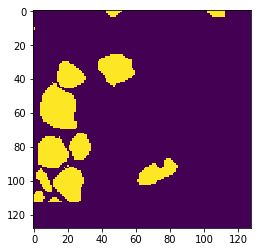

In [20]:
iou_matrix = dice_jaccard_object(wshed_pred, wshed_mask)

In [16]:
print(iou_matrix)


[[2. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# copy inputs so original arrays are not modified
pred = np.copy(wshed_pred)
truth = np.copy(wshed_mask)
    
# label ground truth masks, neccesary if not already tagged with cellID numbers
truth = skimage.measure.label(truth, connectivity = 2)
    
# create empty intersection over union matrix, with shape n(truth) by m(prediction)
iou_matrix = np.zeros((truth.max(), pred.max()))

crop_size = 128
threshold = 0.5

crop = np.zeros((crop_size, crop_size))
crop_pred = pred[0:crop_size, 0:crop_size]
crop_truth = truth[0:crop_size, 0:crop_size]
            
plt.imshow(crop_pred)
            
    
    
    
print('truth min is: ', crop_truth.min(), ' max is: ', crop_truth.max())
print('prediction min is: ', crop_pred.min(), ' max is: ', crop_pred.max())

print(np.unique(crop_truth))
print(np.unique(crop_pred))
    
for n in np.unique(crop_truth):
    for m in np.unique(crop_pred):
        intersection = np.logical_and( crop_pred==m, crop_truth==n)
        union = np.logical_or( crop_pred==m, crop_truth==n)
      
        print('intersection is: ', np.sum(intersection), ' union is: ', np.sum(union))
     
        iou = np.sum(intersection) / np.sum(union)
            
     #   print('iou is: ', iou)
        
        if iou > threshold:
              print('Hit!, ', iou)
              iou_matrix[n][m] = 1
    
    
#calc_cropped_ious(crop_pred, crop_truth, threshold, iou_matrix)